# Causeme

In [1]:
import sys
sys.path.append("../../") # if running from this folder
import torch
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from src.models import NAVAR, TAMCaD, TAMCaD_UA
from src.training import train_model, train_test_split
from tqdm.notebook import trange, tqdm
from src.utils import load_data, write_causeme_predictions
from src.eval import plot_heatmaps

In [2]:
name = 'nonlinear-VAR_N-5_T-300'
test = False

In [3]:
dataset = load_data('causeme', name).as_dict()
print({k: v.shape if isinstance(v, torch.Tensor) else v for k, v in dataset.items()})

{'name': 'nonlinear-VAR_N-5_T-300', 'data': torch.Size([200, 5, 300])}


In [4]:
def plot_causal_matrix(_results, plot_ep=False):
    _results = _results[:5]
    plot_heatmaps(*[r['test_artifacts']['matrix'] for r in _results], names=[f"Dataset {i+1}" for i in range(len(_results))])
    fig = plt.gcf()
    fig.set_size_inches(3 * len(_results) + 1, 3, forward=True)
    plt.savefig(f'{name}_heatmap.png', dpi=180)
    plt.show()
    if plot_ep:
        plot_heatmaps(*[r['test_artifacts']['matrix_ep'] for r in _results], names=[f"Dataset {i+1}" for i in range(len(_results))])
        fig = plt.gcf()
        fig.set_size_inches(3 * len(_results) + 1, 3, forward=True)
        plt.savefig(f'{name}_heatmap.png', dpi=180)
        plt.show()

In [5]:
params = {
    'model_type': NAVAR, 
    'lambda1': 0.1,
    'hidden_dim': 12, 
    'weight_sharing': True, 
    'epochs': 600,
    'dropout': 0.2,
    'experiment_name': 'causeme',
    'lr': 1e-3,
    'weight_decay': 1e-8,
    'test_size': 0.3,
    'kernel_size': 2,
    'n_blocks': 2,
    'n_layers': 2,
    'use_positional_embedding': False
}
if test:
    all_test_results = []
    for i in range(3):
        all_test_results.append(train_model(
            experiment_run=name,
            dataset={'name': dataset['name'], 'data':dataset['data'][i:i+1]},
            **params))
    print(all_test_results[0].keys())
    
    plt.plot(*all_test_results[0]['train_metrics']['loss'], label='train')
    plt.plot(*all_test_results[0]['test_metrics']['loss'], label='test')
    plt.legend()
    plt.show()

Dataset 1/200


[train] loss=0.60 [test] loss=0.69: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.42it/s]


Dataset 2/200


[train] loss=0.70 [test] loss=0.74: 100%|████████████████████████████████████████████| 400/400 [00:15<00:00, 25.21it/s]


Dataset 3/200


[train] loss=0.58 [test] loss=0.63: 100%|████████████████████████████████████████████| 400/400 [00:15<00:00, 25.11it/s]


Dataset 4/200


[train] loss=0.77 [test] loss=0.73: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.81it/s]


Dataset 5/200


[train] loss=0.73 [test] loss=0.86: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.56it/s]


Dataset 6/200


[train] loss=0.85 [test] loss=0.95: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.29it/s]


Dataset 7/200


[train] loss=0.64 [test] loss=0.86: 100%|████████████████████████████████████████████| 400/400 [00:17<00:00, 23.14it/s]


Dataset 8/200


[train] loss=0.83 [test] loss=0.86: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.77it/s]


Dataset 9/200


[train] loss=0.74 [test] loss=0.86: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.03it/s]


Dataset 10/200


[train] loss=0.80 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.91it/s]


Dataset 11/200


[train] loss=0.87 [test] loss=0.95: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.30it/s]


Dataset 12/200


[train] loss=0.66 [test] loss=0.68: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.70it/s]


Dataset 13/200


[train] loss=0.44 [test] loss=0.52: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.69it/s]


Dataset 14/200


[train] loss=0.48 [test] loss=0.50: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.56it/s]


Dataset 15/200


[train] loss=0.66 [test] loss=0.69: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.26it/s]


Dataset 16/200


[train] loss=0.76 [test] loss=0.83: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 21.00it/s]


Dataset 17/200


[train] loss=0.62 [test] loss=0.65: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.54it/s]


Dataset 18/200


[train] loss=0.71 [test] loss=0.66: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.86it/s]


Dataset 19/200


[train] loss=0.78 [test] loss=0.83: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.70it/s]


Dataset 20/200


[train] loss=0.54 [test] loss=0.68: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.07it/s]


Dataset 21/200


[train] loss=0.79 [test] loss=0.84: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.28it/s]


Dataset 22/200


[train] loss=0.86 [test] loss=0.87: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.40it/s]


Dataset 23/200


[train] loss=0.73 [test] loss=0.78: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.00it/s]


Dataset 24/200


[train] loss=0.79 [test] loss=0.74: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.56it/s]


Dataset 25/200


[train] loss=0.78 [test] loss=0.88: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.64it/s]


Dataset 26/200


[train] loss=0.65 [test] loss=0.97: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.71it/s]


Dataset 27/200


[train] loss=0.68 [test] loss=0.67: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.69it/s]


Dataset 28/200


[train] loss=0.83 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.22it/s]


Dataset 29/200


[train] loss=0.72 [test] loss=0.79: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.10it/s]


Dataset 30/200


[train] loss=0.72 [test] loss=0.67: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.07it/s]


Dataset 31/200


[train] loss=0.70 [test] loss=0.86: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.77it/s]


Dataset 32/200


[train] loss=0.48 [test] loss=0.45: 100%|████████████████████████████████████████████| 400/400 [00:17<00:00, 23.44it/s]


Dataset 33/200


[train] loss=0.91 [test] loss=0.91: 100%|████████████████████████████████████████████| 400/400 [00:17<00:00, 23.28it/s]


Dataset 34/200


[train] loss=0.60 [test] loss=0.68: 100%|████████████████████████████████████████████| 400/400 [00:17<00:00, 22.70it/s]


Dataset 35/200


[train] loss=0.81 [test] loss=0.75: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.69it/s]


Dataset 36/200


[train] loss=0.57 [test] loss=0.84: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.79it/s]


Dataset 37/200


[train] loss=0.62 [test] loss=0.74: 100%|████████████████████████████████████████████| 400/400 [00:17<00:00, 22.35it/s]


Dataset 38/200


[train] loss=0.65 [test] loss=0.82: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.34it/s]


Dataset 39/200


[train] loss=0.79 [test] loss=0.95: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.58it/s]


Dataset 40/200


[train] loss=0.65 [test] loss=0.62: 100%|████████████████████████████████████████████| 400/400 [00:17<00:00, 23.32it/s]


Dataset 41/200


[train] loss=0.78 [test] loss=0.99: 100%|████████████████████████████████████████████| 400/400 [00:17<00:00, 23.31it/s]


Dataset 42/200


[train] loss=0.74 [test] loss=0.71: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.30it/s]


Dataset 43/200


[train] loss=0.63 [test] loss=0.75: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.84it/s]


Dataset 44/200


[train] loss=0.78 [test] loss=0.86: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.18it/s]


Dataset 45/200


[train] loss=0.62 [test] loss=0.78: 100%|████████████████████████████████████████████| 400/400 [00:15<00:00, 25.05it/s]


Dataset 46/200


[train] loss=0.45 [test] loss=0.58: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.06it/s]


Dataset 47/200


[train] loss=0.68 [test] loss=0.75: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.90it/s]


Dataset 48/200


[train] loss=0.56 [test] loss=0.59: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.65it/s]


Dataset 49/200


[train] loss=0.57 [test] loss=0.45: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.48it/s]


Dataset 50/200


[train] loss=0.47 [test] loss=0.46: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.25it/s]


Dataset 51/200


[train] loss=0.61 [test] loss=0.67: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.23it/s]


Dataset 52/200


[train] loss=0.78 [test] loss=0.78: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.79it/s]


Dataset 53/200


[train] loss=0.68 [test] loss=0.67: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.90it/s]


Dataset 54/200


[train] loss=0.78 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.85it/s]


Dataset 55/200


[train] loss=0.65 [test] loss=0.84: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.26it/s]


Dataset 56/200


[train] loss=0.84 [test] loss=0.96: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.85it/s]


Dataset 57/200


[train] loss=0.90 [test] loss=0.80: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.84it/s]


Dataset 58/200


[train] loss=0.54 [test] loss=0.54: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.04it/s]


Dataset 59/200


[train] loss=0.66 [test] loss=0.70: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.13it/s]


Dataset 60/200


[train] loss=0.86 [test] loss=0.99: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.39it/s]


Dataset 61/200


[train] loss=0.79 [test] loss=0.68: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.12it/s]


Dataset 62/200


[train] loss=0.59 [test] loss=0.60: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.76it/s]


Dataset 63/200


[train] loss=0.72 [test] loss=0.67: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.76it/s]


Dataset 64/200


[train] loss=0.61 [test] loss=0.67: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.15it/s]


Dataset 65/200


[train] loss=0.70 [test] loss=0.63: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 23.57it/s]


Dataset 66/200


[train] loss=0.87 [test] loss=0.87: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.21it/s]


Dataset 67/200


[train] loss=0.77 [test] loss=0.95: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.18it/s]


Dataset 68/200


[train] loss=0.80 [test] loss=0.75: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.55it/s]


Dataset 69/200


[train] loss=0.54 [test] loss=0.57: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.11it/s]


Dataset 70/200


[train] loss=0.77 [test] loss=0.75: 100%|████████████████████████████████████████████| 400/400 [00:16<00:00, 24.50it/s]


Dataset 71/200


[train] loss=0.48 [test] loss=0.52: 100%|████████████████████████████████████████████| 400/400 [00:17<00:00, 23.46it/s]


Dataset 72/200


[train] loss=0.68 [test] loss=0.67: 100%|████████████████████████████████████████████| 400/400 [00:17<00:00, 23.32it/s]


Dataset 73/200


[train] loss=0.80 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.97it/s]


Dataset 74/200


[train] loss=0.67 [test] loss=0.80: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.51it/s]


Dataset 75/200


[train] loss=0.79 [test] loss=0.79: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.95it/s]


Dataset 76/200


[train] loss=0.55 [test] loss=0.58: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.53it/s]


Dataset 77/200


[train] loss=0.68 [test] loss=0.69: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.31it/s]


Dataset 78/200


[train] loss=0.64 [test] loss=0.68: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.89it/s]


Dataset 79/200


[train] loss=0.48 [test] loss=0.49: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.86it/s]


Dataset 80/200


[train] loss=0.80 [test] loss=1.00: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.73it/s]


Dataset 81/200


[train] loss=0.78 [test] loss=0.80: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.15it/s]


Dataset 82/200


[train] loss=0.80 [test] loss=0.93: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.63it/s]


Dataset 83/200


[train] loss=0.55 [test] loss=0.53: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.86it/s]


Dataset 84/200


[train] loss=0.79 [test] loss=0.78: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.36it/s]


Dataset 85/200


[train] loss=0.76 [test] loss=0.68: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.98it/s]


Dataset 86/200


[train] loss=0.69 [test] loss=0.81: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.22it/s]


Dataset 87/200


[train] loss=0.42 [test] loss=0.64: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 18.16it/s]


Dataset 88/200


[train] loss=0.63 [test] loss=0.65: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.72it/s]


Dataset 89/200


[train] loss=0.48 [test] loss=0.45: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.69it/s]


Dataset 90/200


[train] loss=0.80 [test] loss=0.76: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.60it/s]


Dataset 91/200


[train] loss=0.86 [test] loss=0.76: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.60it/s]


Dataset 92/200


[train] loss=0.79 [test] loss=0.90: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.16it/s]


Dataset 93/200


[train] loss=0.65 [test] loss=0.62: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.69it/s]


Dataset 94/200


[train] loss=0.58 [test] loss=0.57: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.62it/s]


Dataset 95/200


[train] loss=0.66 [test] loss=0.73: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.53it/s]


Dataset 96/200


[train] loss=0.80 [test] loss=0.89: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.96it/s]


Dataset 97/200


[train] loss=0.78 [test] loss=0.90: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.65it/s]


Dataset 98/200


[train] loss=0.76 [test] loss=0.91: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.18it/s]


Dataset 99/200


[train] loss=0.80 [test] loss=0.75: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.07it/s]


Dataset 100/200


[train] loss=0.55 [test] loss=0.59: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.33it/s]


Dataset 101/200


[train] loss=0.53 [test] loss=0.55: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.66it/s]


Dataset 102/200


[train] loss=0.58 [test] loss=0.90: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.14it/s]


Dataset 103/200


[train] loss=0.66 [test] loss=0.79: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.31it/s]


Dataset 104/200


[train] loss=0.81 [test] loss=1.00: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.11it/s]


Dataset 105/200


[train] loss=0.36 [test] loss=0.36: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.10it/s]


Dataset 106/200


[train] loss=0.88 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 18.05it/s]


Dataset 107/200


[train] loss=0.77 [test] loss=0.74: 100%|████████████████████████████████████████████| 400/400 [00:30<00:00, 13.27it/s]


Dataset 108/200


[train] loss=0.60 [test] loss=0.51: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.97it/s]


Dataset 109/200


[train] loss=0.47 [test] loss=0.58: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.19it/s]


Dataset 110/200


[train] loss=0.47 [test] loss=0.69: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.82it/s]


Dataset 111/200


[train] loss=0.88 [test] loss=0.80: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.89it/s]


Dataset 112/200


[train] loss=0.88 [test] loss=0.88: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.73it/s]


Dataset 113/200


[train] loss=0.56 [test] loss=0.43: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.83it/s]


Dataset 114/200


[train] loss=0.61 [test] loss=0.62: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 21.02it/s]


Dataset 115/200


[train] loss=0.62 [test] loss=0.72: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.38it/s]


Dataset 116/200


[train] loss=0.76 [test] loss=0.76: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.81it/s]


Dataset 117/200


[train] loss=0.47 [test] loss=0.40: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.82it/s]


Dataset 118/200


[train] loss=0.68 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 19.04it/s]


Dataset 119/200


[train] loss=0.44 [test] loss=0.48: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.85it/s]


Dataset 120/200


[train] loss=0.52 [test] loss=0.54: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.52it/s]


Dataset 121/200


[train] loss=0.74 [test] loss=0.73: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.97it/s]


Dataset 122/200


[train] loss=0.57 [test] loss=0.58: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.53it/s]


Dataset 123/200


[train] loss=0.67 [test] loss=0.75: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.25it/s]


Dataset 124/200


[train] loss=0.76 [test] loss=0.99: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.78it/s]


Dataset 125/200


[train] loss=0.48 [test] loss=0.41: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.78it/s]


Dataset 126/200


[train] loss=0.84 [test] loss=0.94: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.23it/s]


Dataset 127/200


[train] loss=0.69 [test] loss=0.82: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.65it/s]


Dataset 128/200


[train] loss=0.48 [test] loss=0.39: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.91it/s]


Dataset 129/200


[train] loss=0.77 [test] loss=0.74: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.42it/s]


Dataset 130/200


[train] loss=0.82 [test] loss=0.87: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.97it/s]


Dataset 131/200


[train] loss=0.94 [test] loss=0.94: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.70it/s]


Dataset 132/200


[train] loss=0.86 [test] loss=0.91: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.32it/s]


Dataset 133/200


[train] loss=0.86 [test] loss=0.83: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.95it/s]


Dataset 134/200


[train] loss=0.36 [test] loss=0.41: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.06it/s]


Dataset 135/200


[train] loss=0.66 [test] loss=0.88: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.50it/s]


Dataset 136/200


[train] loss=0.56 [test] loss=0.57: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.98it/s]


Dataset 137/200


[train] loss=0.78 [test] loss=0.87: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.32it/s]


Dataset 138/200


[train] loss=0.84 [test] loss=0.91: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.65it/s]


Dataset 139/200


[train] loss=0.79 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 18.14it/s]


Dataset 140/200


[train] loss=0.81 [test] loss=0.86: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.92it/s]


Dataset 141/200


[train] loss=0.73 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.79it/s]


Dataset 142/200


[train] loss=0.82 [test] loss=0.98: 100%|████████████████████████████████████████████| 400/400 [00:25<00:00, 15.91it/s]


Dataset 143/200


[train] loss=0.65 [test] loss=0.71: 100%|████████████████████████████████████████████| 400/400 [00:25<00:00, 15.55it/s]


Dataset 144/200


[train] loss=0.66 [test] loss=0.63: 100%|████████████████████████████████████████████| 400/400 [00:24<00:00, 16.27it/s]


Dataset 145/200


[train] loss=0.78 [test] loss=0.89: 100%|████████████████████████████████████████████| 400/400 [00:23<00:00, 16.93it/s]


Dataset 146/200


[train] loss=0.88 [test] loss=0.88: 100%|████████████████████████████████████████████| 400/400 [00:24<00:00, 16.10it/s]


Dataset 147/200


[train] loss=0.83 [test] loss=0.95: 100%|████████████████████████████████████████████| 400/400 [00:26<00:00, 15.19it/s]


Dataset 148/200


[train] loss=0.80 [test] loss=0.90: 100%|████████████████████████████████████████████| 400/400 [00:24<00:00, 16.46it/s]


Dataset 149/200


[train] loss=0.92 [test] loss=0.89: 100%|████████████████████████████████████████████| 400/400 [00:25<00:00, 15.76it/s]


Dataset 150/200


[train] loss=0.74 [test] loss=0.81: 100%|████████████████████████████████████████████| 400/400 [00:25<00:00, 15.64it/s]


Dataset 151/200


[train] loss=0.72 [test] loss=0.74: 100%|████████████████████████████████████████████| 400/400 [00:24<00:00, 16.62it/s]


Dataset 152/200


[train] loss=0.76 [test] loss=0.80: 100%|████████████████████████████████████████████| 400/400 [00:23<00:00, 16.81it/s]


Dataset 153/200


[train] loss=0.44 [test] loss=0.41: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.24it/s]


Dataset 154/200


[train] loss=0.58 [test] loss=0.63: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.59it/s]


Dataset 155/200


[train] loss=0.82 [test] loss=0.82: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.73it/s]


Dataset 156/200


[train] loss=0.48 [test] loss=0.56: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.93it/s]


Dataset 157/200


[train] loss=0.70 [test] loss=0.62: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.52it/s]


Dataset 158/200


[train] loss=0.81 [test] loss=0.93: 100%|████████████████████████████████████████████| 400/400 [00:23<00:00, 17.12it/s]


Dataset 159/200


[train] loss=0.59 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.66it/s]


Dataset 160/200


[train] loss=0.75 [test] loss=0.96: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.49it/s]


Dataset 161/200


[train] loss=0.81 [test] loss=0.89: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.30it/s]


Dataset 162/200


[train] loss=0.65 [test] loss=0.63: 100%|████████████████████████████████████████████| 400/400 [00:23<00:00, 17.19it/s]


Dataset 163/200


[train] loss=0.42 [test] loss=0.45: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.19it/s]


Dataset 164/200


[train] loss=0.74 [test] loss=0.70: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.81it/s]


Dataset 165/200


[train] loss=0.56 [test] loss=0.58: 100%|████████████████████████████████████████████| 400/400 [00:23<00:00, 17.11it/s]


Dataset 166/200


[train] loss=0.55 [test] loss=0.56: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.25it/s]


Dataset 167/200


[train] loss=0.83 [test] loss=0.88: 100%|████████████████████████████████████████████| 400/400 [00:23<00:00, 16.96it/s]


Dataset 168/200


[train] loss=0.45 [test] loss=0.44: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.58it/s]


Dataset 169/200


[train] loss=0.73 [test] loss=0.63: 100%|████████████████████████████████████████████| 400/400 [00:23<00:00, 17.15it/s]


Dataset 170/200


[train] loss=0.39 [test] loss=0.55: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 18.02it/s]


Dataset 171/200


[train] loss=0.78 [test] loss=0.81: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.35it/s]


Dataset 172/200


[train] loss=0.86 [test] loss=0.99: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 18.14it/s]


Dataset 173/200


[train] loss=0.78 [test] loss=0.79: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.34it/s]


Dataset 174/200


[train] loss=0.73 [test] loss=0.70: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.61it/s]


Dataset 175/200


[train] loss=0.86 [test] loss=1.00: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.65it/s]


Dataset 176/200


[train] loss=0.70 [test] loss=0.69: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.49it/s]


Dataset 177/200


[train] loss=0.64 [test] loss=0.73: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.54it/s]


Dataset 178/200


[train] loss=0.37 [test] loss=0.49: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.10it/s]


Dataset 179/200


[train] loss=0.54 [test] loss=0.57: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.13it/s]


Dataset 180/200


[train] loss=0.74 [test] loss=0.83: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.58it/s]


Dataset 181/200


[train] loss=0.68 [test] loss=0.68: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.30it/s]


Dataset 182/200


[train] loss=0.83 [test] loss=0.88: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 18.08it/s]


Dataset 183/200


[train] loss=0.81 [test] loss=0.83: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.97it/s]


Dataset 184/200


[train] loss=0.47 [test] loss=0.66: 100%|████████████████████████████████████████████| 400/400 [00:23<00:00, 17.18it/s]


Dataset 185/200


[train] loss=0.56 [test] loss=0.49: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.44it/s]


Dataset 186/200


[train] loss=0.87 [test] loss=0.86: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.13it/s]


Dataset 187/200


[train] loss=0.75 [test] loss=0.83: 100%|████████████████████████████████████████████| 400/400 [00:23<00:00, 16.93it/s]


Dataset 188/200


[train] loss=0.74 [test] loss=0.92: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 17.69it/s]


Dataset 189/200


[train] loss=0.57 [test] loss=0.52: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.46it/s]


Dataset 190/200


[train] loss=0.73 [test] loss=0.76: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 18.05it/s]


Dataset 191/200


[train] loss=0.57 [test] loss=0.97: 100%|████████████████████████████████████████████| 400/400 [00:22<00:00, 18.06it/s]


Dataset 192/200


[train] loss=0.79 [test] loss=0.72: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.34it/s]


Dataset 193/200


[train] loss=0.63 [test] loss=0.56: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 21.00it/s]


Dataset 194/200


[train] loss=0.62 [test] loss=0.65: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.25it/s]


Dataset 195/200


[train] loss=0.82 [test] loss=1.02: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.96it/s]


Dataset 196/200


[train] loss=0.63 [test] loss=0.63: 100%|████████████████████████████████████████████| 400/400 [00:18<00:00, 21.07it/s]


Dataset 197/200


[train] loss=0.62 [test] loss=0.57: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.80it/s]


Dataset 198/200


[train] loss=0.64 [test] loss=0.85: 100%|████████████████████████████████████████████| 400/400 [00:20<00:00, 19.77it/s]


Dataset 199/200


[train] loss=0.69 [test] loss=0.61: 100%|████████████████████████████████████████████| 400/400 [00:19<00:00, 20.79it/s]


Dataset 200/200


[train] loss=0.83 [test] loss=0.82: 100%|████████████████████████████████████████████| 400/400 [00:21<00:00, 18.62it/s]


dict_keys(['train_artifacts', 'test_artifacts', 'model_params', 'train_data', 'test_data', 'train_metrics', 'test_metrics'])


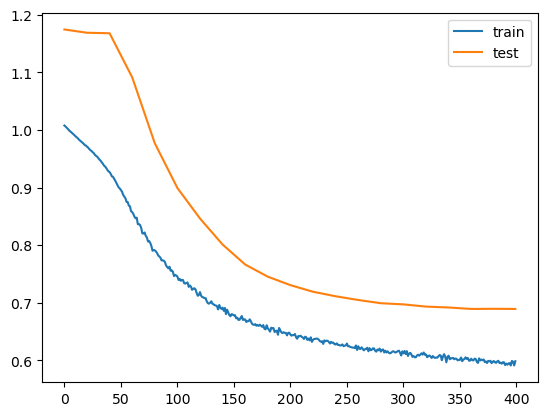

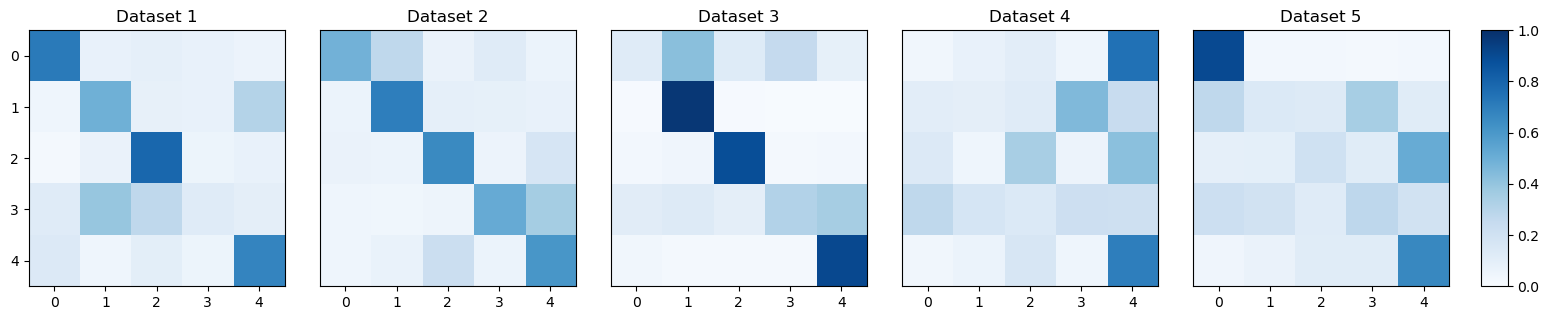

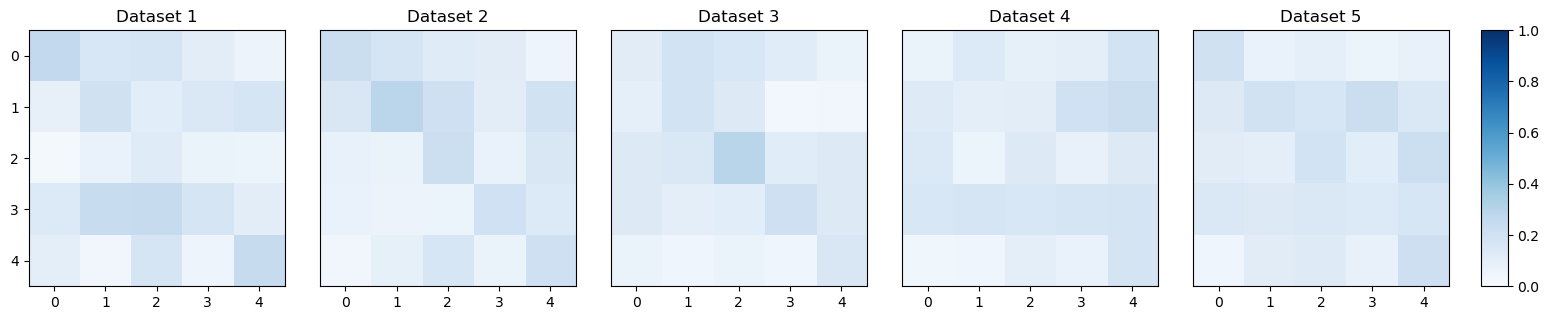

In [6]:
params = {
    'model_type': TAMCaD_UA, 
    'n_ensembles': 30,
    'gamma': 0.0,
    'lambda1': 0.1,
    'hidden_dim': 12, 
    'weight_sharing': True, 
    'epochs': 400,
    'dropout': 0.2,
    'experiment_name': 'causeme',
    'lr': 1e-3,
    'weight_decay': 1e-8,
    'test_size': 0.3,
    'kernel_size': 2,
    'n_blocks': 2,
    'n_layers': 2,
    'use_positional_embedding': False
}

all_datasets = 3 if test else dataset['data'].size(0)

all_results = []
for i in range(all_datasets):
    print(f'Dataset {i+1}/{all_datasets}')
    all_results.append(train_model(
        experiment_run=name,
        dataset={'name': dataset['name'], 'data':dataset['data'][i:i+1]},
        **params))
print(all_results[0].keys())

plt.plot(*all_results[0]['train_metrics']['loss'], label='train')
plt.plot(*all_results[0]['test_metrics']['loss'], label='test')
plt.legend()
plt.show()

if test:
    plot_causal_matrix(all_test_results)
plot_causal_matrix(all_results, plot_ep=True)

In [9]:
if not test:
    scores = torch.stack([r['test_artifacts']['matrix'] for r in all_results]).transpose(-1, -2)
    print(scores.shape)
    write_causeme_predictions('TAMCaD_UA', name, scores, type='UA', hidden_dim=params['hidden_dim'])

torch.Size([200, 5, 5])
